# Chapter 3

## Explore & Prepare Data

In [29]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
print(mnist.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details', 'categories', 'url'])


In [30]:
print(mnist["DESCR"])

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

### Load Digits & Targets

In [31]:
digits = mnist["data"]
digits.shape

(70000, 784)

In [32]:
targets = mnist["target"]
targets.shape

(70000,)

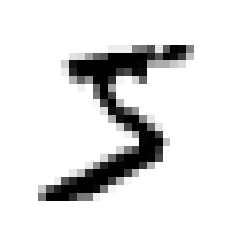

In [33]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = digits[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

In [34]:
targets[0]

'5'

Most ML algorithms expect numerical data so let's cast the targets to integers

In [35]:
import numpy as np

targets = targets.astype(np.uint8)

### Select Our Train & Test Sets

In [36]:
digits_train, digits_test, targets_train, targets_test = digits[:60000], digits[60000:], targets[:60000], targets[60000:]

### Train a Binary Classifier on Only '5'

In [37]:
targets_train_5 = (targets_train == 5)
targets_test_5  = (targets_test == 5)

In [38]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(digits_train, targets_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

#### Guess the First Image

In [39]:
sgd_clf.predict([some_digit])

array([ True])

### Performance Measures

#### Using Cross-Validation

In [40]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, digits_train, targets_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

#### Confusion Matrix

In [41]:
from sklearn.model_selection import cross_val_predict

targets_train_pred = cross_val_predict(sgd_clf, digits_train, targets_train_5, cv=3)

In [42]:
from sklearn.metrics import confusion_matrix

confusion_matrix(targets_train_5, targets_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

#### Precision and Recall

In [43]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision_score(targets_train_5, targets_train_pred)

0.8370879772350012

In [44]:
recall_score(targets_train_5, targets_train_pred)

0.6511713705958311

In [45]:
f1_score(targets_train_5, targets_train_pred)

0.7325171197343846

#### Precision/Recall Tradeoff

In [47]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [51]:
y_scores = cross_val_predict(sgd_clf, digits_train, targets_train_5, cv=3, method="decision_function")

In [55]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(targets_train_5, y_scores)

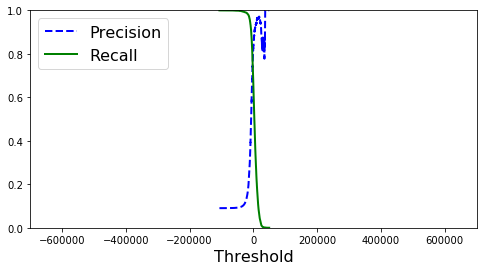

In [56]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-700000, 700000])
plt.show()

### ROC Curve

In [63]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(targets_train_5, y_scores)
print(fpr)
print(tpr)
print(thresholds)

[0.         0.         0.         ... 0.99937705 0.99937705 1.        ]
[0.00000000e+00 1.84467810e-04 9.22339052e-04 ... 9.99815532e-01
 1.00000000e+00 1.00000000e+00]
[  49442.43765905   49441.43765905   36801.60697028 ... -105763.22240074
 -106527.45300471 -146348.56726174]


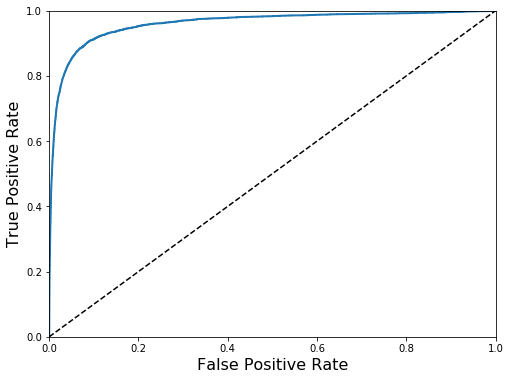

In [62]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()